### Instructions to import dataset from kaggle can be found here:
[How to fetch Kaggle Datasets into Google Colab](https://medium.com/analytics-vidhya/how-to-fetch-kaggle-datasets-into-google-colab-ea682569851a)

### Monting Google drive for dataset

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


### Run the following code to provide the config path to kaggle.json

In [0]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle/Cats-vs-Dogs"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

### Change your present working directory

In [5]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle/Cats-vs-Dogs
#Check the present working directory using pwd command

/content/gdrive/My Drive/Kaggle/Cats-vs-Dogs


### Download the kaggle dataset
##### - Go to kaggle and copy the API Command to download the dataset
![alt text](https://miro.medium.com/max/1400/1*EgvWkUzP0lMoDvxF6tBJLg.png)

##### - Your API Command will look like “kaggle datasets download -d datasnaek/youtube-new”
##### - Run the following code using ! :
`!kaggle datasets download -d datasnaek/youtube-new`

##### You can check the content in your directory using ls command as follows:
![alt text](https://miro.medium.com/max/1400/1*ftuRmHyIIXQpjTM8-xauRA.png) 

In [8]:
!kaggle kernels pull uysimty/keras-cnn-dog-or-cat-classification

Source code downloaded to /content/gdrive/My Drive/Kaggle/keras-cnn-dog-or-cat-classification.ipynb


### API for Cats vs Dogs not available. Manually uploading in required directory.

In [9]:
!ls

kaggle.json  test1.zip	train.zip


### Moving Zip files to "Cats vs Dogs" Directory using GDrive

-----------------------------------------------------
### Importing libraries

In [0]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os

### Extracting Zip

In [11]:
pwd

'/content/gdrive/My Drive/Kaggle/Cats-vs-Dogs'

In [0]:
import zipfile

location_zip = 'train.zip'
zip_ref = zipfile.ZipFile(location_zip,'r')         # Reading ZipFiles
zip_ref.extractall()
zip_ref.close()   

In [0]:
import zipfile

location_zip = 'test1.zip'
zip_ref = zipfile.ZipFile(location_zip,'r')         # Reading ZipFiles
zip_ref.extractall()
zip_ref.close()   

### Dividing Training into dogs and cats

In [0]:
filenames = os.listdir()
categories=[]
for f_name in filenames:
    category=f_name.split('.')[0]
    if category=='dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename':filenames,
    'category':categories
})

In [16]:
%cd /content/gdrive/My Drive/Kaggle/Cats-vs-Dogs/train

/content/gdrive/My Drive/Kaggle/Cats-vs-Dogs/train


### Image dimensions

In [0]:
Image_Width = 150
Image_Height = 150
Image_Size = (Image_Width,Image_Height)
Image_Channels = 3

### Training and Validation dataframe

In [0]:
df["category"] = df["category"].replace({0:'cat',1:'dog'})

train_df , validate_df = train_test_split(df, 
                                          test_size=0.20,
                                          random_state=42
                                          )
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=20

### Data Generators

In [23]:
train_datagen = ImageDataGenerator(
                  rescale = 1./255,
                  rotation_range = 15,
                  shear_range = 0.1,
                  zoom_range = 0.2,
                  horizontal_flip = True,
                  width_shift_range = 0.1,
                  height_shift_range = 0.1
                )

train_generator = train_datagen.flow_from_dataframe(
                  train_df,
                  x_col='filename',
                  y_col='category',
                  target_size = (150,150),  
                  class_mode = 'binary',
                  batch_size = batch_size             
                ) 

validation_datagen = ImageDataGenerator(
                  rescale = 1./255,
                )

validation_generator = validation_datagen.flow_from_dataframe(
                  validate_df,
                  x_col = 'filename',
                  y_col = 'category',
                  target_size = (150, 150),
                  batch_size = batch_size,
                  class_mode = 'binary'
                )

Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


### Defining the same model as earlier

In [0]:
model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512,activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Dense(1,activation='sigmoid')
        ]
    )

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
batch_normalization_5 (Batch (None, 148, 148, 32)      128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
batch_normalization_6 (Batch (None, 72, 72, 64)        256       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)       

### Compiling the model

In [0]:
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['acc'])

### Fitting the model

In [32]:
history = model.fit(
            train_generator,
            epochs = 10,
            steps_per_epoch = 20000//batch_size,       # steps_per_epoch = total_train_images//batch_size # taking more steps pre epoch due to less data
            validation_data = validation_generator,
            validation_steps =  5000//batch_size,     # validation_steps = total_validation_images//batch_size
            verbose = 1
          )

Epoch 1/10
1000/1000 [==============================] - 221s 221ms/step - loss: 0.4174 - acc: 0.8098 - val_loss: 0.4250 - val_acc: 0.8040
Epoch 2/10
1000/1000 [==============================] - 222s 222ms/step - loss: 0.3750 - acc: 0.8353 - val_loss: 0.2981 - val_acc: 0.8710
Epoch 3/10
1000/1000 [==============================] - 222s 222ms/step - loss: 0.3399 - acc: 0.8499 - val_loss: 0.2751 - val_acc: 0.8826
Epoch 4/10
1000/1000 [==============================] - 221s 221ms/step - loss: 0.3169 - acc: 0.8636 - val_loss: 0.2739 - val_acc: 0.8858
Epoch 5/10
1000/1000 [==============================] - 231s 231ms/step - loss: 0.2974 - acc: 0.8744 - val_loss: 0.2334 - val_acc: 0.9114
Epoch 6/10
1000/1000 [==============================] - 213s 213ms/step - loss: 0.2875 - acc: 0.8789 - val_loss: 0.2403 - val_acc: 0.9098
Epoch 7/10
1000/1000 [==============================] - 211s 211ms/step - loss: 0.2800 - acc: 0.8821 - val_loss: 0.2813 - val_acc: 0.8826
Epoch 8/10
1000/1000 [============

### Visualising the model accuracy 

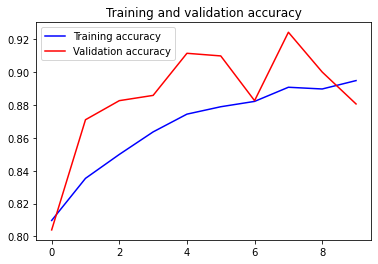

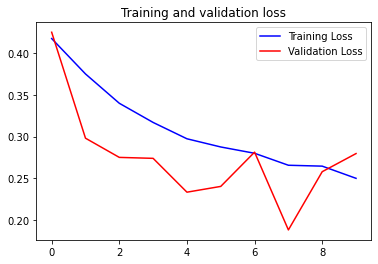

In [33]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### To save the model:


```
 model.save("model1_catsVSdogs_10epoch.h5")
```



## Model did alot better even in 10 epochs!